#**DA-Data exploratory Analysis**


In [60]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Dataset Unico con feature comuni a tutte le classi**

In [61]:

dataset1_path = '/content/drive/MyDrive/Merged_Dataset.csv'

dataset2_path = '/content/drive/MyDrive/Merged_EvilTwin_Dataset.csv'


df1 = pd.read_csv(dataset1_path)
df2 = pd.read_csv(dataset2_path)

# Lista delle feature comuni
common_features = [
    'frame.number', 'frame.len', 'wlan.duration', 'wlan.ra', 'wlan.ta',
    'wlan.da', 'wlan.sa', 'wlan.bssid', 'wlan.frag', 'wlan.seq',
    'wlan.fc.type', 'wlan.fc.subtype', 'data.len', 'pitch', 'roll',
    'yaw', 'class'
]


df1_common = df1[common_features]
df2_common = df2[common_features]


merged_df = pd.concat([df1_common, df2_common], ignore_index=True)




In [62]:
import pandas as pd

file_path = '/content/drive/MyDrive/Full_merged_dataset.csv'

dataset_f = pd.read_csv(file_path)

dataset_f.head()

,frame.number,frame.len,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.fc.type,wlan.fc.subtype,data.len,pitch,roll,yaw,class
0,60,24,0,1,1,1,1,0,0,24,2,4,0,0,0,0,benign
1,61,24,0,1,1,1,1,0,0,26,2,4,0,0,0,0,benign
2,75,104,0,4,1,4,1,0,0,49,0,8,0,0,0,0,benign
3,122,86,44,1,0,1,0,0,0,14,2,8,0,0,0,0,benign
4,124,26,60,1,0,1,0,0,0,0,2,12,0,0,0,0,benign


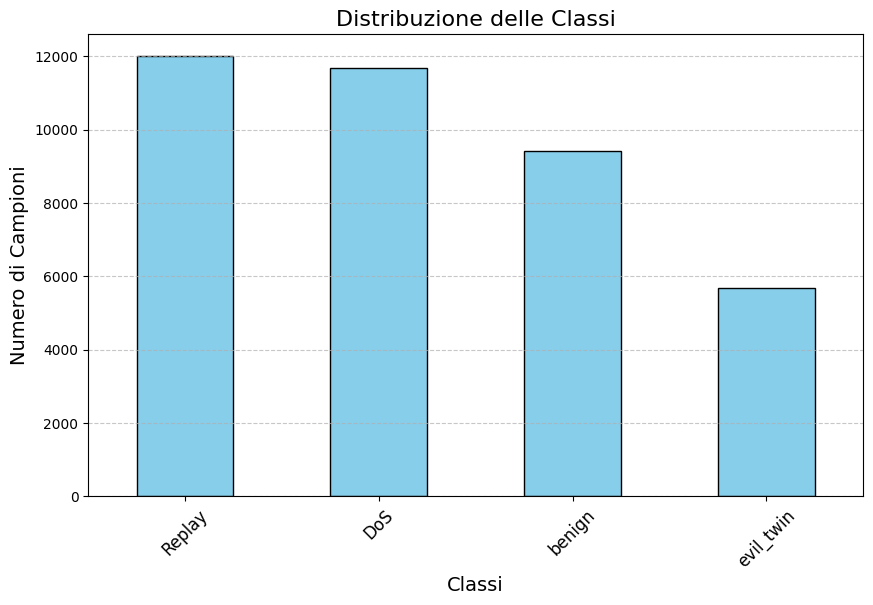

{'Numero di righe': 38783,
 'Numero di colonne': 17,
 'Valori mancanti': 0,
 'Distribuzione delle classi': {'Replay': 12006,
  'DoS': 11671,
  'benign': 9425,
  'evil_twin': 5681}}

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = dataset_f['class'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuzione delle Classi', fontsize=16)
plt.xlabel('Classi', fontsize=14)
plt.ylabel('Numero di Campioni', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



class_distribution = dataset_f['class'].value_counts()

missing_values = dataset_f.isnull().sum()


summary = {
    'Numero di righe': dataset_f.shape[0],
    'Numero di colonne': dataset_f.shape[1],
    'Valori mancanti': missing_values.sum(),
    'Distribuzione delle classi': class_distribution.to_dict()
}

summary

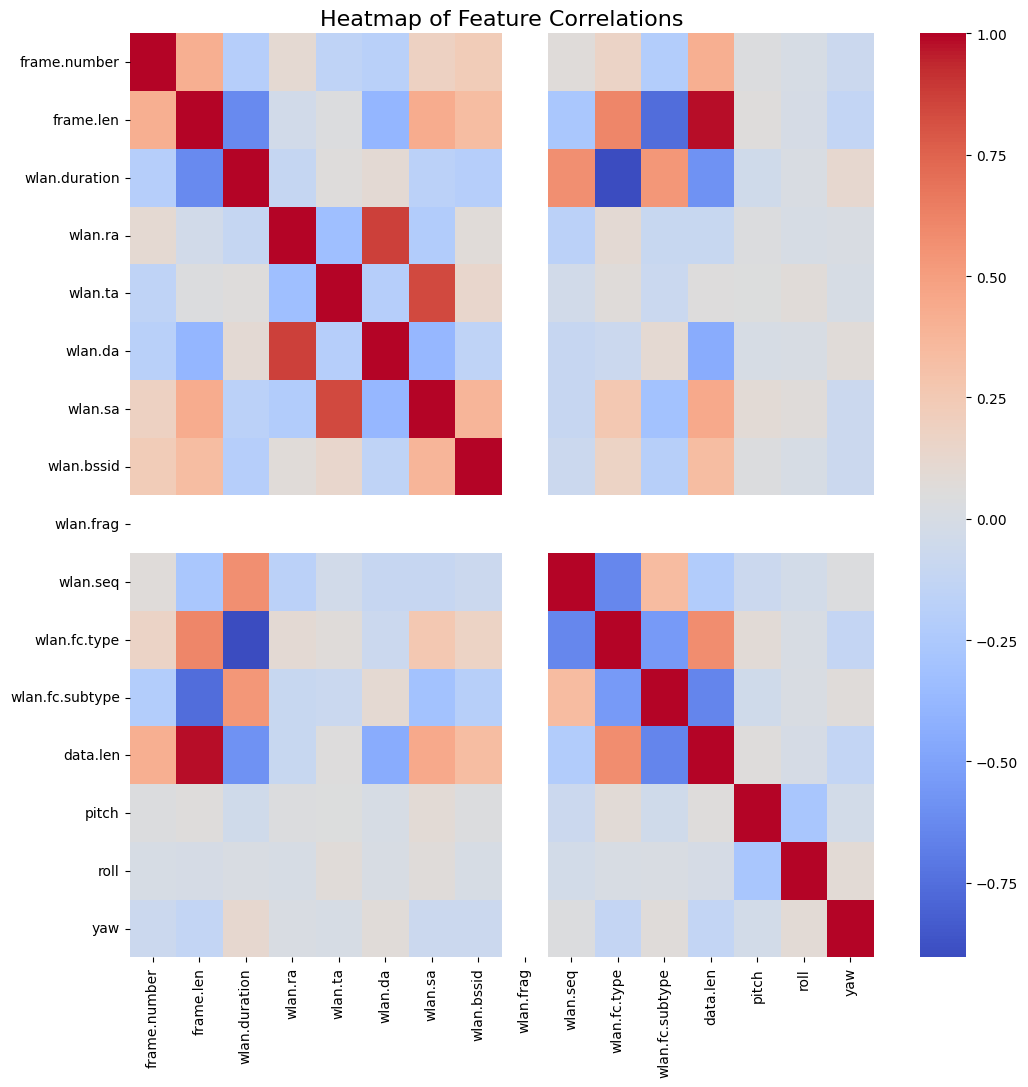

In [64]:


# Heatmap
plt.figure(figsize=(12, 12))
numeric_dataset = dataset_f.select_dtypes(include=np.number)
correlation_matrix = numeric_dataset.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Feature Correlations', fontsize=16)
plt.show()

# **DECISION TREE MODEL**

10-Fold Cross-Validation Scores on Training Set (Min-Max): [0.92330003 0.92007734 0.92265549 0.91621012 0.92652272 0.91685466
 0.92295293 0.92037395 0.91972921 0.93423598]
Average Cross-Validation Accuracy (Min-Max): 0.9222912437018895

10-Fold Cross-Validation Scores on Training Set (Z-score): [0.92458911 0.92039961 0.92233323 0.91524331 0.92620045 0.91685466
 0.92263056 0.92037395 0.91972921 0.93326886]
Average Cross-Validation Accuracy (Z-score): 0.9221622946367705

Metrics using Min-Max Normalization:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2322
           1       0.93      0.89      0.91      2373
           2       0.90      0.94      0.92      1915
           3       1.00      1.00      1.00      1147

    accuracy                           0.93      7757
   macro avg       0.94      0.94      0.94      7757
weighted avg       0.93      0.93      0.93      7757

Accuracy on Test Set: 0.9281938

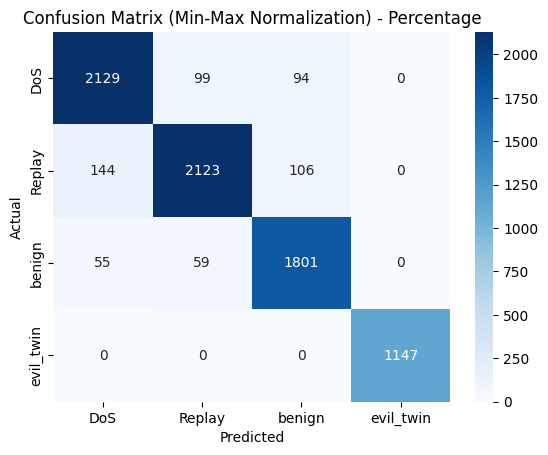


Metrics using Z-score Normalization:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2322
           1       0.93      0.89      0.91      2373
           2       0.90      0.94      0.92      1915
           3       1.00      1.00      1.00      1147

    accuracy                           0.93      7757
   macro avg       0.94      0.94      0.94      7757
weighted avg       0.93      0.93      0.93      7757

Accuracy on Test Set: 0.9279360577542864


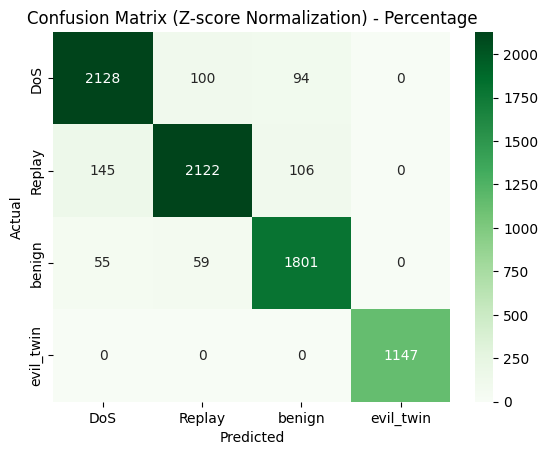

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()

X = dataset_f.drop(columns=['class', 'frame.number'])
y = dataset_f['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


pipeline_min_max = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_z_score = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

cv_scores_minmax = cross_val_score(pipeline_min_max, X_train, y_train_encoded, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Scores on Training Set (Min-Max):", cv_scores_minmax)
print("Average Cross-Validation Accuracy (Min-Max):", cv_scores_minmax.mean())

cv_scores_zscore = cross_val_score(pipeline_z_score, X_train, y_train_encoded, cv=10, scoring='accuracy')
print("\n10-Fold Cross-Validation Scores on Training Set (Z-score):", cv_scores_zscore)
print("Average Cross-Validation Accuracy (Z-score):", cv_scores_zscore.mean())

pipeline_min_max.fit(X_train, y_train_encoded)

y_pred_minmax = pipeline_min_max.predict(X_test)
print("\nMetrics using Min-Max Normalization:")
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_minmax))
print("Accuracy on Test Set:", accuracy_score(y_test_encoded, y_pred_minmax))

conf_matrix_minmax = confusion_matrix(y_test_encoded, y_pred_minmax)
conf_matrix_minmax_percentage = conf_matrix_minmax / conf_matrix_minmax.sum(axis=1, keepdims=True) * 100
sns.heatmap(conf_matrix_minmax, annot=True, fmt='', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Min-Max Normalization) - Percentage')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

pipeline_z_score.fit(X_train, y_train_encoded)

y_pred_zscore = pipeline_z_score.predict(X_test)
print("\nMetrics using Z-score Normalization:")
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_zscore))
print("Accuracy on Test Set:", accuracy_score(y_test_encoded, y_pred_zscore))

conf_matrix_zscore = confusion_matrix(y_test_encoded, y_pred_zscore)
conf_matrix_zscore_percentage = conf_matrix_zscore / conf_matrix_zscore.sum(axis=1, keepdims=True) * 100
sns.heatmap(conf_matrix_zscore, annot=True, fmt='', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Z-score Normalization) - Percentage')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



**FEATURE IMPORTANCE**

<ipython-input-66-a7d4e96671eb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


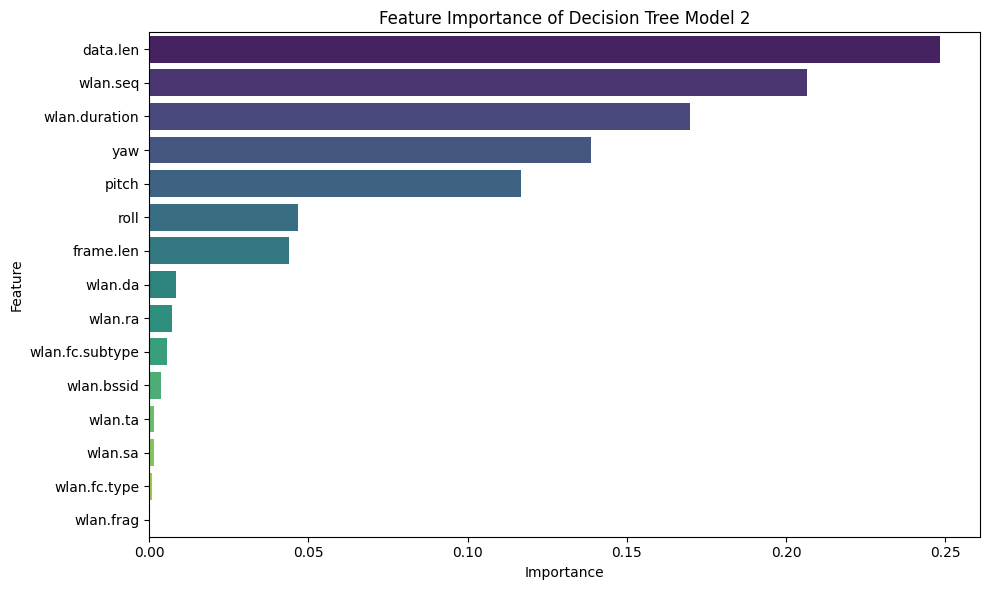

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dt_model = pipeline_min_max.named_steps['classifier']

if hasattr(dt_model, 'feature_importances_'):
    feature_importances = dt_model.feature_importances_

    features_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
    plt.title('Feature Importance of Decision Tree Model 2')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("The model does not have feature importances. Ensure the classifier is a DecisionTreeClassifier.")

**CODE WITH PCA**

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
import numpy as np



X = dataset_f.drop(columns=['class', 'frame.number'])
y = dataset_f['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Pipeline con PCA
pipeline_pca = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_pca.fit(X_train, y_train_encoded)

y_pred_pca = pipeline_pca.predict(X_test)


pca_model = pipeline_pca.named_steps['pca']
print(f"Number of components after PCA: {pca_model.n_components_}")




print("Classification Report (Min-Max with PCA):")
print(classification_report(y_test_encoded, y_pred_pca))
print("Accuracy on Test Set (Min-Max with PCA):", accuracy_score(y_test_encoded, y_pred_pca))

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_pca_stratified = cross_val_score(pipeline_pca, X_train, y_train_encoded, cv=stratified_kfold, scoring='accuracy')
print("10-Fold Stratified Cross-Validation Scores on Training Set (Min-Max stratified):", cv_scores_pca_stratified)
print("Average Stratified Cross-Validation Accuracy (Min-Max stratified):", cv_scores_pca_stratified.mean())
print("\n" + "="*50 + "\n")

cv_scores_pca = cross_val_score(pipeline_pca, X_train, y_train_encoded, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Scores on Training Set (Pipeline with PCA):", cv_scores_pca)
print("Average Cross-Validation Accuracy (Pipeline with PCA):", cv_scores_pca.mean())
print("\n" + "="*50 + "\n")


# ---- PCA with Z-Score Normalization ---- #


pipeline_zscore_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])


pipeline_zscore_pca.fit(X_train, y_train_encoded)


y_pred_zscore_pca = pipeline_zscore_pca.predict(X_test)




print("Classification Report (Z-Score + PCA):")
print(classification_report(y_test_encoded, y_pred_zscore_pca))
print("Accuracy on Test Set (Z-Score + PCA):", accuracy_score(y_test_encoded, y_pred_zscore_pca))


cv_scores_zscore_pca = cross_val_score(pipeline_zscore_pca, X_train, y_train_encoded, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Scores (Z-Score + PCA):", cv_scores_zscore_pca)
print("Average Cross-Validation Accuracy (Z-Score + PCA):", cv_scores_zscore_pca.mean())


pca_model_zscore = pipeline_zscore_pca.named_steps['pca']
print(f"\nNumber of features before PCA: {X_train.shape[1]}")
print(f"Number of features after PCA (Min-Max): {pca_model.n_components_}")
print(f"Number of features after PCA (Z-Score): {pca_model_zscore.n_components_}")


Number of components after PCA: 6
Classification Report (Min-Max with PCA):
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3420
           1       0.80      0.79      0.80      3589
           2       0.87      0.90      0.89      2888
           3       1.00      1.00      1.00      1738

    accuracy                           0.85     11635
   macro avg       0.87      0.87      0.87     11635
weighted avg       0.85      0.85      0.85     11635

Accuracy on Test Set (Min-Max with PCA): 0.8511388053287494
10-Fold Stratified Cross-Validation Scores on Training Set (Min-Max stratified): [0.84014733 0.84198895 0.84714549 0.83278085 0.84972376 0.84383057
 0.85488029 0.84640884 0.84377303 0.84487841]
Average Stratified Cross-Validation Accuracy (Min-Max stratified): 0.8445557514341434


10-Fold Cross-Validation Scores on Training Set (Pipeline with PCA): [0.8441989  0.84935543 0.84088398 0.84051565 0.8305709  0.85414365
 0.8427256 

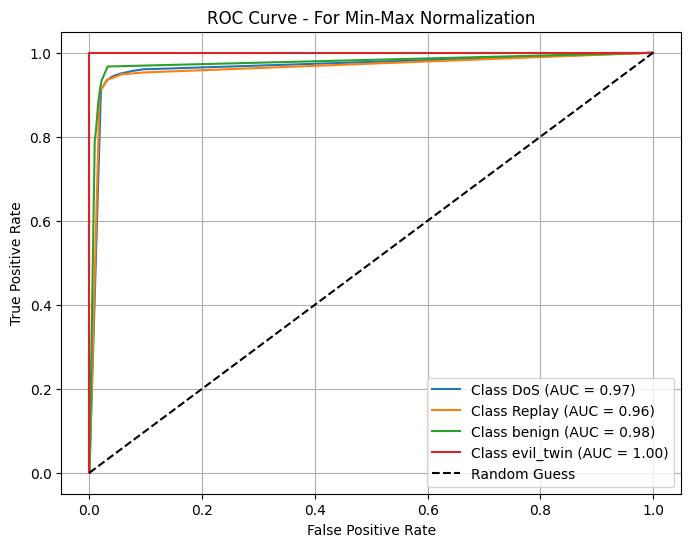

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


classes = label_encoder.classes_
y_test_binarized = label_binarize(y_test_encoded, classes=range(len(classes)))
y_pred_prob_minmax = pipeline_min_max.predict_proba(X_test)


plt.figure(figsize=(8, 6))
for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob_minmax[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_prob_minmax[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {auc:.2f})")


plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve - For Min-Max Normalization")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()



**FEATURE IMPORTANCE**

<ipython-input-69-3ecf58dd19c1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


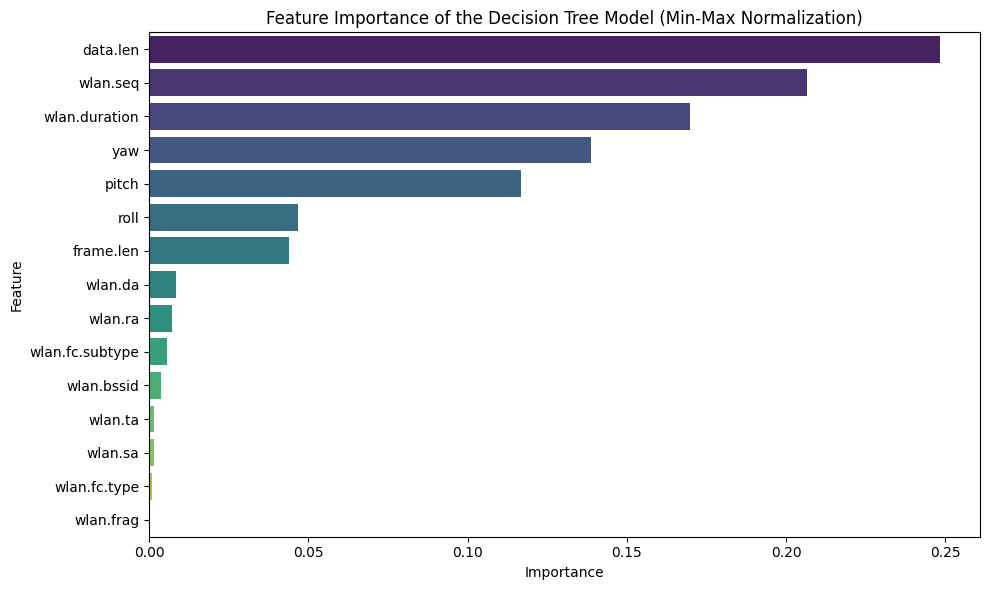

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dt_model = pipeline_min_max.named_steps['classifier']
feature_importances = dt_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importance of the Decision Tree Model (Min-Max Normalization)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


#**NAIVE BAYESIAN MODEL**

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd


label_encoder = LabelEncoder()

def evaluate_pipeline(pipeline, X_train, X_test, y_train_encoded, y_test_encoded, scaler_name):
    print(f"\n=== {scaler_name} Normalization ===")


    pipeline.fit(X_train, y_train_encoded)


    y_pred = pipeline.predict(X_test)


    print("Classification Report:")
    print(classification_report(y_test_encoded, y_pred))
    print("Accuracy on Test Set:", accuracy_score(y_test_encoded, y_pred))


    cv_scores = cross_val_score(pipeline, X_train, y_train_encoded, cv=10, scoring='accuracy')
    print("10-Fold Cross-Validation Scores on Training Set:", cv_scores)
    print("Average Cross-Validation Accuracy:", cv_scores.mean())


X = dataset_f.drop(columns=['class', 'frame.number'])
y = dataset_f['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


pipeline_min_max = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', GaussianNB())
])


pipeline_z_score = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])


evaluate_pipeline(pipeline_min_max, X_train, X_test, y_train_encoded, y_test_encoded, "Min-Max")


evaluate_pipeline(pipeline_z_score, X_train, X_test, y_train_encoded, y_test_encoded, "Z-Score")





=== Min-Max Normalization ===
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.79      0.65      3420
           1       0.58      0.09      0.16      3589
           2       0.60      0.86      0.70      2888
           3       0.86      0.97      0.91      1738

    accuracy                           0.62     11635
   macro avg       0.65      0.68      0.61     11635
weighted avg       0.62      0.62      0.55     11635

Accuracy on Test Set: 0.620627417275462
10-Fold Cross-Validation Scores on Training Set: [0.61141805 0.61878453 0.59116022 0.6092081  0.61178637 0.61583794
 0.60331492 0.61362799 0.62085483 0.62269713]
Average Cross-Validation Accuracy: 0.6118690074384102

=== Z-Score Normalization ===
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.79      0.65      3420
           1       0.58      0.09      0.16      3589
           2       0.59      0.83     

**CONFUSION MATRIX**

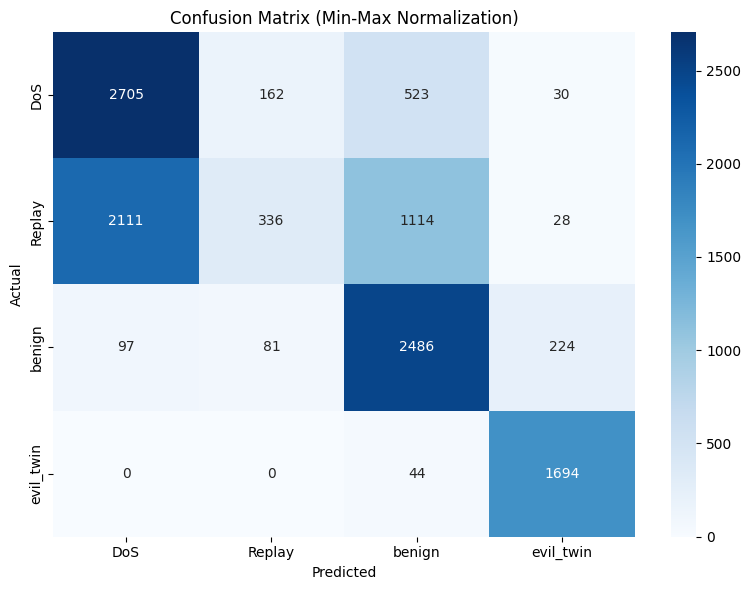

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = pipeline_min_max.predict(X_test)


conf_matrix = confusion_matrix(y_test_encoded, y_pred)


conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Min-Max Normalization)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


**CODE WITH PCA**

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score


X = dataset_f.drop(columns=['class', 'frame.number'])
y = dataset_f['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


pipeline_minmax_pca_nb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', GaussianNB())
])


pipeline_minmax_pca_nb.fit(X_train, y_train_encoded)

y_pred_minmax_pca = pipeline_minmax_pca_nb.predict(X_test)


print(f"Numero di feature prima della PCA (Min-Max): {X_train.shape[1]}")
print(f"Numero di feature dopo la PCA (Min-Max): {pipeline_minmax_pca_nb.named_steps['pca'].n_components_}")


print("Metrics for Min-Max Normalization with PCA:")
print("Classification Report (Min-Max + PCA):")
print(classification_report(y_test_encoded, y_pred_minmax_pca))
print("Accuracy on Test Set (Min-Max + PCA):", accuracy_score(y_test_encoded, y_pred_minmax_pca))


stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_minmax_stratified_pca = cross_val_score(pipeline_minmax_pca_nb, X_train, y_train_encoded, cv=stratified_kfold, scoring='accuracy')
print("10-Fold Stratified Cross-Validation Scores on Training Set (Min-Max + PCA + stratified):", cv_scores_minmax_stratified_pca)
print("Average Stratified Cross-Validation Accuracy (Min-Max + PCA + stratified):", cv_scores_minmax_stratified_pca.mean())
print("\n" + "="*50 + "\n")


cv_scores_minmax_pca = cross_val_score(pipeline_minmax_pca_nb, X_train, y_train_encoded, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Scores (Min-Max + PCA):", cv_scores_minmax_pca)
print("Average Cross-Validation Accuracy (Min-Max + PCA):", cv_scores_minmax_pca.mean())
print("\n" + "="*50 + "\n")



pipeline_zscore_pca_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', GaussianNB())
])


pipeline_zscore_pca_nb.fit(X_train, y_train_encoded)


y_pred_zscore_pca = pipeline_zscore_pca_nb.predict(X_test)


print(f"Numero di feature prima della PCA (Z-Score): {X_train.shape[1]}")
print(f"Numero di feature dopo la PCA (Z-Score): {pipeline_zscore_pca_nb.named_steps['pca'].n_components_}")


print("Metrics for Z-Score Normalization with PCA:")
print("Classification Report (Z-Score + PCA):")
print(classification_report(y_test_encoded, y_pred_zscore_pca))
print("Accuracy on Test Set (Z-Score + PCA):", accuracy_score(y_test_encoded, y_pred_zscore_pca))

Numero di feature prima della PCA (Min-Max): 15
Numero di feature dopo la PCA (Min-Max): 6
Metrics for Min-Max Normalization with PCA:
Classification Report (Min-Max + PCA):
              precision    recall  f1-score   support

           0       0.56      0.83      0.67      3420
           1       0.74      0.17      0.28      3589
           2       0.62      0.68      0.65      2888
           3       0.65      0.95      0.78      1738

    accuracy                           0.61     11635
   macro avg       0.64      0.66      0.59     11635
weighted avg       0.64      0.61      0.56     11635

Accuracy on Test Set (Min-Max + PCA): 0.6083369144821659
10-Fold Stratified Cross-Validation Scores on Training Set (Min-Max + PCA + stratified): [0.59263352 0.59963168 0.60110497 0.59558011 0.59963168 0.59926335
 0.60662983 0.59926335 0.59211496 0.60906411]
Average Stratified Cross-Validation Accuracy (Min-Max + PCA + stratified): 0.5994917561352295


10-Fold Cross-Validation Scores (Min

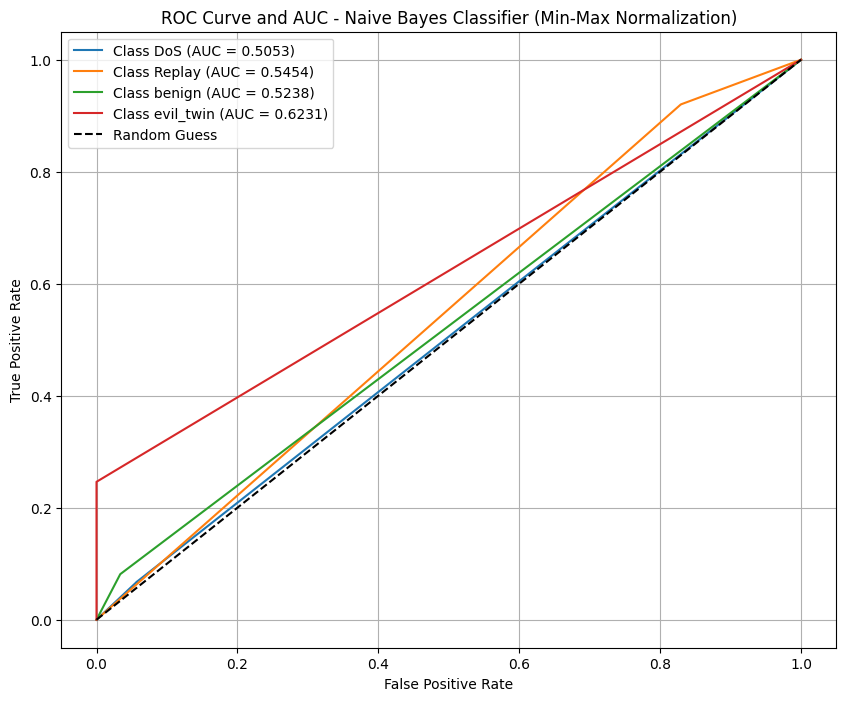

In [73]:


X_train_array = X_train.values if hasattr(X_train, 'values') else X_train
X_test_array = X_test.values if hasattr(X_test, 'values') else X_test


pipeline_min_max.fit(X_train_array, y_train_encoded)


y_pred_proba = pipeline_min_max.named_steps['classifier'].predict_proba(X_test_array)


y_test_binarized = label_binarize(y_test_encoded, classes=range(len(label_encoder.classes_)))


plt.figure(figsize=(10, 8))
for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_score:.4f})')


plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title('ROC Curve and AUC - Naive Bayes Classifier (Min-Max Normalization)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()
plt.show()


#**MULTI LAYER FEED FORWARD NEURAL NETWORK**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5782 - loss: 0.9047 - val_accuracy: 0.6926 - val_loss: 0.6298
Epoch 2/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6816 - loss: 0.6498 - val_accuracy: 0.6917 - val_loss: 0.5968
Epoch 3/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6999 - loss: 0.6135 - val_accuracy: 0.7199 - val_loss: 0.5793
Epoch 4/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7065 - loss: 0.6002 - val_accuracy: 0.7099 - val_loss: 0.5764
Epoch 5/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7075 - loss: 0.5916 - val_accuracy: 0.7079 - val_loss: 0.5745
Epoch 6/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7110 - loss: 0.5889 - val_accuracy: 0.7195 - val_loss: 0.5681
Epoch 7/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7098 - loss: 0.5813 - val_accuracy: 0.7273 - val_loss: 0.5655
Epoch 8/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7204 - loss: 0.5785 - val_accuracy: 0.7341 - val_

<Figure size 800x600 with 0 Axes>

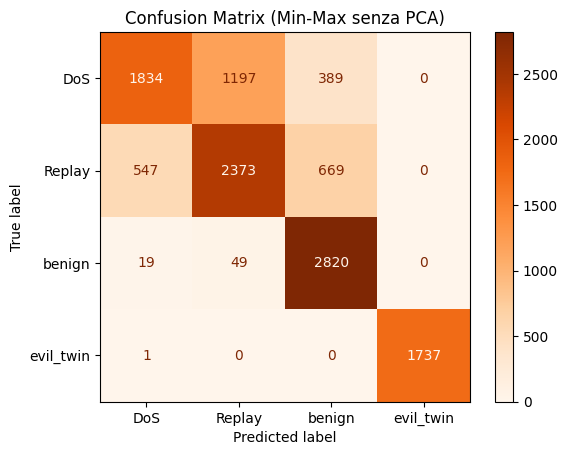

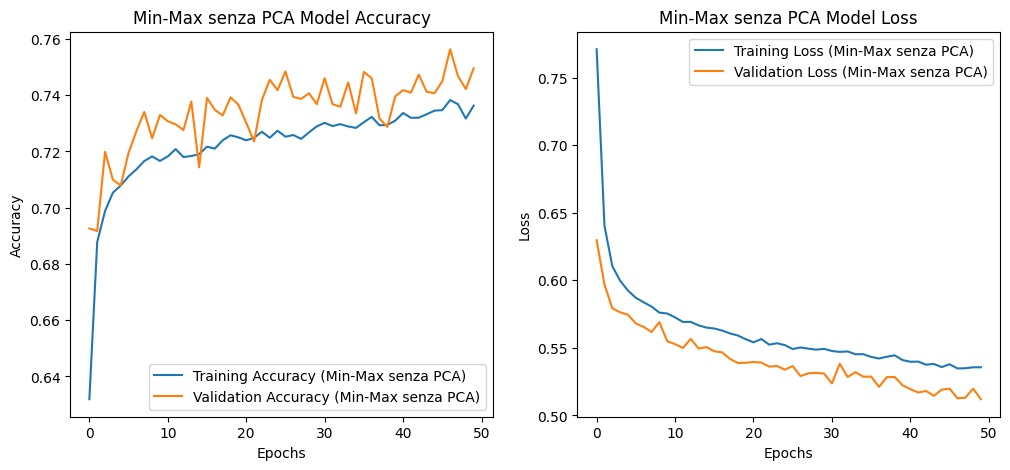

Numero di componenti principali scelti (Min-Max PCA): 6
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5824 - loss: 0.8971 - val_accuracy: 0.6707 - val_loss: 0.6306
Epoch 2/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6796 - loss: 0.6437 - val_accuracy: 0.7123 - val_loss: 0.5896
Epoch 3/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6956 - loss: 0.6162 - val_accuracy: 0.6862 - val_loss: 0.5889
Epoch 4/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7027 - loss: 0.6000 - val_accuracy: 0.7245 - val_loss: 0.5807
Epoch 5/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7062 - loss: 0.5956 - val_accuracy: 0.7112 - val_loss: 0.5776
Epoch 6/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7111 - loss: 0.5925 - val_accuracy: 0.7297 - val_loss: 0.5751
Epoch 7/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7137 - loss: 0.5946 - val_accuracy: 0.7144 - val_loss: 0.5756
Epoch 8/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7146 - loss: 0.5887 - val_accuracy: 0.7287 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


679/679 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6062 - loss: 0.8345 - val_accuracy: 0.7204 - val_loss: 0.5587
Epoch 2/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7314 - loss: 0.5810 - val_accuracy: 0.7702 - val_loss: 0.5129
Epoch 3/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7618 - loss: 0.5352 - val_accuracy: 0.7923 - val_loss: 0.4891
Epoch 4/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7613 - loss: 0.5301 - val_accuracy: 0.7924 - val_loss: 0.4798
Epoch 5/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7792 - loss: 0.5063 - val_accuracy: 0.8022 - val_loss: 0.4643
Epoch 6/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7868 - loss: 0.4925 - val_accuracy: 0.8026 - val_loss: 0.4581
Epoch 7/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7845 - loss: 0.4958 - val_accuracy: 0.8101 - val_loss: 0.4529
Epoch 8/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7888 - loss: 0.4856 - val_accuracy: 0.8103 - val_

In [74]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


X = dataset_f.drop(columns=['class', 'frame.number'])
y = dataset_f['class']


X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


label_encoder = LabelEncoder()
y_train_full_encoded = label_encoder.fit_transform(y_train_full)
y_test_encoded = label_encoder.transform(y_test)


def build_mlp_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# -- Min-Max Scaling senza PCA --#
scaler_minmax = MinMaxScaler()
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train_full)
X_test_scaled_minmax = scaler_minmax.transform(X_test)


model_minmax_no_pca = build_mlp_model(X_train_scaled_minmax.shape[1])
history_minmax_no_pca = model_minmax_no_pca.fit(X_train_scaled_minmax, y_train_full_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


y_test_pred_minmax_no_pca = model_minmax_no_pca.predict(X_test_scaled_minmax)
y_test_pred_classes_minmax_no_pca = tf.argmax(y_test_pred_minmax_no_pca, axis=1).numpy()

print("Test Metrics (Min-Max senza PCA):")
print(classification_report(y_test_encoded, y_test_pred_classes_minmax_no_pca))
print("Test Accuracy (Min-Max senza PCA):", accuracy_score(y_test_encoded, y_test_pred_classes_minmax_no_pca))


cm_minmax_no_pca = confusion_matrix(y_test_encoded, y_test_pred_classes_minmax_no_pca)
disp_minmax_no_pca = ConfusionMatrixDisplay(confusion_matrix=cm_minmax_no_pca, display_labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
disp_minmax_no_pca.plot(cmap='Oranges', values_format='d')
plt.title('Confusion Matrix (Min-Max senza PCA)')
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_minmax_no_pca.history['accuracy'], label='Training Accuracy (Min-Max senza PCA)')
plt.plot(history_minmax_no_pca.history['val_accuracy'], label='Validation Accuracy (Min-Max senza PCA)')
plt.title('Min-Max senza PCA Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_minmax_no_pca.history['loss'], label='Training Loss (Min-Max senza PCA)')
plt.plot(history_minmax_no_pca.history['val_loss'], label='Validation Loss (Min-Max senza PCA)')
plt.title('Min-Max senza PCA Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# -- Min-Max Scaling con PCA --#
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled_minmax)
X_test_pca = pca.transform(X_test_scaled_minmax)

print(f"Numero di componenti principali scelti (Min-Max PCA): {pca.n_components_}")

model_pca_minmax = build_mlp_model(X_train_pca.shape[1])
history_pca_minmax = model_pca_minmax.fit(X_train_pca, y_train_full_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_test_pred_pca_minmax = model_pca_minmax.predict(X_test_pca)
y_test_pred_classes_pca_minmax = tf.argmax(y_test_pred_pca_minmax, axis=1).numpy()

print("Test Metrics (Min-Max con PCA):")
print(classification_report(y_test_encoded, y_test_pred_classes_pca_minmax))
print("Test Accuracy (Min-Max con PCA):", accuracy_score(y_test_encoded, y_test_pred_classes_pca_minmax))


# -- Z-Score Scaling (senza PCA) per confronto --#
scaler_zscore = StandardScaler()
X_train_scaled_zscore = scaler_zscore.fit_transform(X_train_full)
X_test_scaled_zscore = scaler_zscore.transform(X_test)

model_zscore = build_mlp_model(X_train_scaled_zscore.shape[1])
history_zscore = model_zscore.fit(X_train_scaled_zscore, y_train_full_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_test_pred_zscore = model_zscore.predict(X_test_scaled_zscore)
y_test_pred_classes_zscore = tf.argmax(y_test_pred_zscore, axis=1).numpy()

print("Test Metrics (Z-Score):")
print(classification_report(y_test_encoded, y_test_pred_classes_zscore))
print("Test Accuracy (Z-Score):", accuracy_score(y_test_encoded, y_test_pred_classes_zscore))


364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


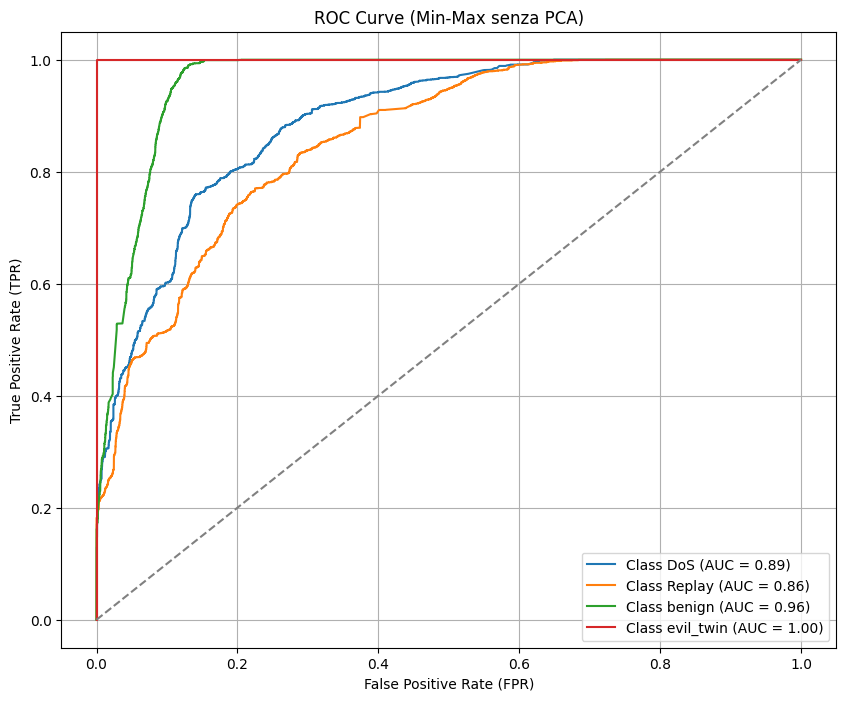

In [75]:


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(len(label_encoder.classes_)))


y_test_pred_prob_minmax_no_pca = model_minmax_no_pca.predict(X_test_scaled_minmax)


plt.figure(figsize=(10, 8))
for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob_minmax_no_pca[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')


plt.title('ROC Curve (Min-Max senza PCA)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
